In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("car_prices.csv")
df.head(3)

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928


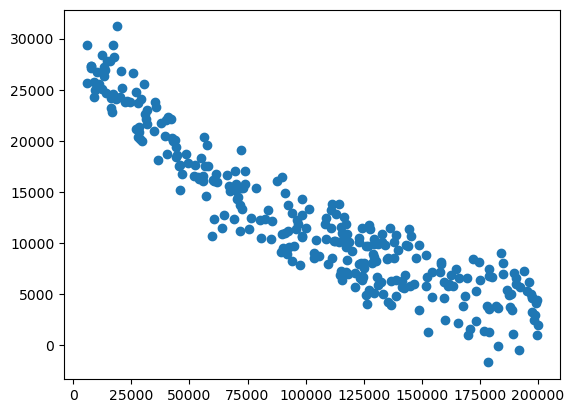

In [4]:
plt.scatter(df.mileage,df.selling_price)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = df[['mileage']]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [6]:
X.shape, X_test.shape , X_train.shape

((300, 1), (60, 1), (240, 1))

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # You can adjust the degree based on model performance
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [8]:
X_train[:5]

,mileage
102,44504
108,43660
96,125151
294,64040
11,131324


In [9]:
X_train_poly[:5]

array([[1.00000000e+00, 4.45040000e+04, 1.98060602e+09],
       [1.00000000e+00, 4.36600000e+04, 1.90619560e+09],
       [1.00000000e+00, 1.25151000e+05, 1.56627728e+10],
       [1.00000000e+00, 6.40400000e+04, 4.10112160e+09],
       [1.00000000e+00, 1.31324000e+05, 1.72459930e+10]])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(3942449.0425903373, 0.9161450769964844)

In [12]:
import numpy as np
x_range = np.linspace(X['mileage'].min() , X['mileage'].max(), 300).reshape(-1, 1)

In [13]:
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

C:\Users\IshaanSingh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


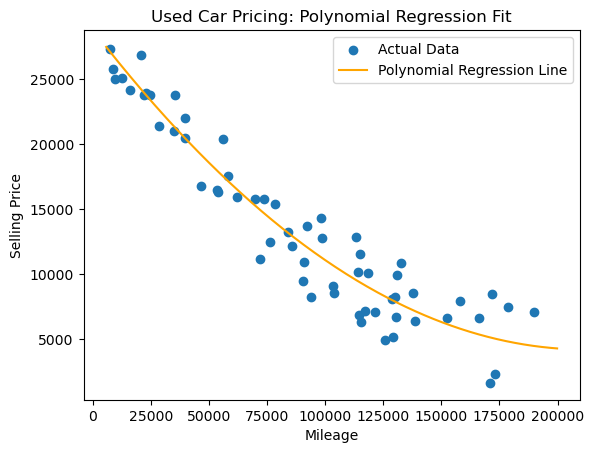

In [14]:
plt.scatter(X_test['mileage'], y_test, label='Actual Data')
plt.plot(x_range, y_range_pred, color='orange', label='Polynomial Regression Line')
plt.title('Used Car Pricing: Polynomial Regression Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.legend()
plt.show()